## TEAM PARIS - LP3 - Classification Project (Customer Churn)

#### Introduction/Background
Customer attrition is one of the biggest expenditures of any
organization. Customer churn otherwise known as customer attrition or
customer turnover is the percentage of customers that stopped using your
company\'s product or service within a specified timeframe.\
For instance, if you began the year with **500 customers** but later ended
with **480 customers,** the percentage of customers that left would be **4%.**
If we could figure out why a customer leaves and when they leave with
reasonable accuracy, it would immensely help the organization to
strategize their retention initiatives manifold.

In this project, we aim to find the **likelihood of a customer leaving the
organization,** the **key indicators of churn** as well as **the retention
strategies** that can be implemented to avert this problem.

#### *****_Hypothesis and Questions_*****

**_Hypothesis_**

*__Null:__*
_Customers churn as a result of paying  high charges._

*__Alternate:__*
Customers who pay high charges do not churn.


**_Questions_**
1. How much do senior citizens and non-senior citizens pays on a monthly basis?

2. How much is generated from customers with internet service?

3. What is the ratio of customers and their type contracts?

4. What categories of contracts generate the most revenue?

5. Do high paying customers use Stream TV or/and Stream movies?

6. Do non-senior citizens have multiple lines?

7. Do customers with dependents spend more than customers without dependents?

8. What payment methods do customers prefer/use more?

#### Importing libraries

In [1]:
# Importing the required libraries

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
import glob

In [2]:
# Previewing the data
telco = pd.read_csv('Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Listing the columns in the data
telco.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
#getting the shape of the data
telco.shape

(7043, 21)

In [5]:
#checking for more information about the data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#investigating missing valyues
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# checking for unique values
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Univariate Anlaysis

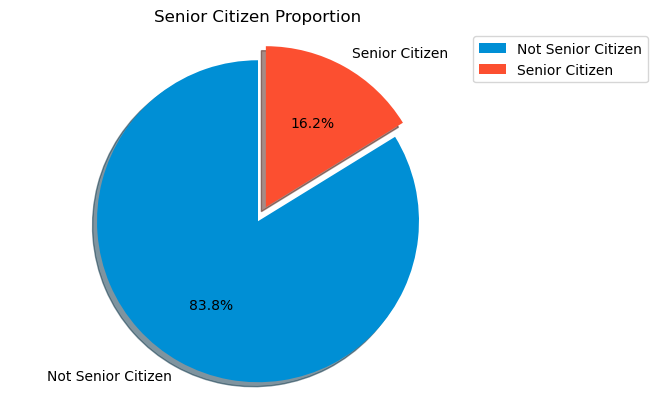

In [8]:
# Plotting Senior Citizen Proportion

senior_citizen_counts = telco['SeniorCitizen'].value_counts()
labels = ['Not Senior Citizen', 'Senior Citizen']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
plt.pie(senior_citizen_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Senior Citizen Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()


The pie chart tells us the customers are predominantly non-senior citizens. ***Senior citizens*** only accounts for **_16.2%_** of the customers

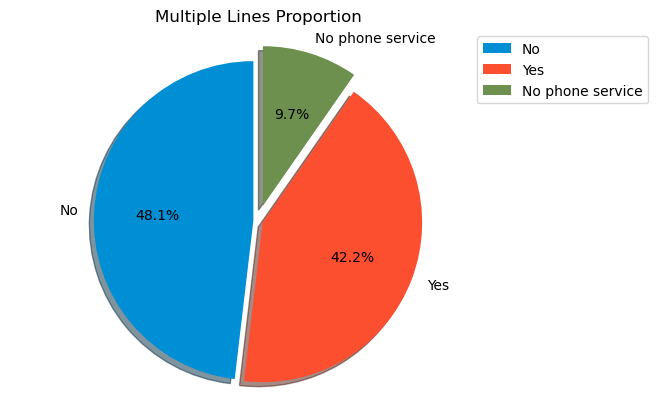

In [9]:
#Plotting the proportion of multiple lines

#multiple_lines_counts = telco['MultipleLines'].value_counts()
#plt.pie(multiple_lines_counts, labels=multiple_lines_counts.index, autopct='%1.1f%%')
#plt.title('Multiple Lines Proportion')
#plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.ylabel('')
#plt.show()

#Plotting the proportion of multiple lines

multiple_lines_counts = telco['MultipleLines'].value_counts()
labels = ['No', 'Yes', 'No phone service']
colors = ['#008fd5', '#fc4f30', '#6d904f']
explode = (0.03, 0.03, 0.1)
plt.pie(multiple_lines_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Multiple Lines Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

**_48.1%_** of customers do not have multiple lines, whereas, **_42.2%_** have multiple lines. This may be becuase these customers have dependents who may also have phone lines registered in the customers' name.

Also we see that **_9.7%_** of customers do not have a any phone service. We might have to investigate further at some ponint to find out if this group of customers use just internet, without a phone line. Either fiber optic or DSL which do not necessarily require a phone line.

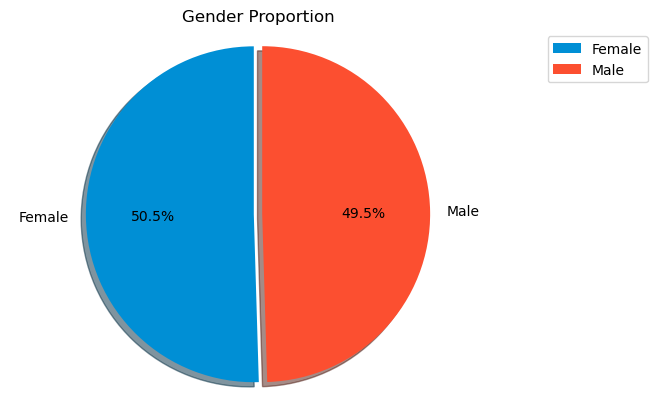

In [10]:
# Plotting Gender Proportion

gender_counts = telco['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.05)
plt.pie(gender_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Gender Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()



It appears the ration of Female to Male is balanced

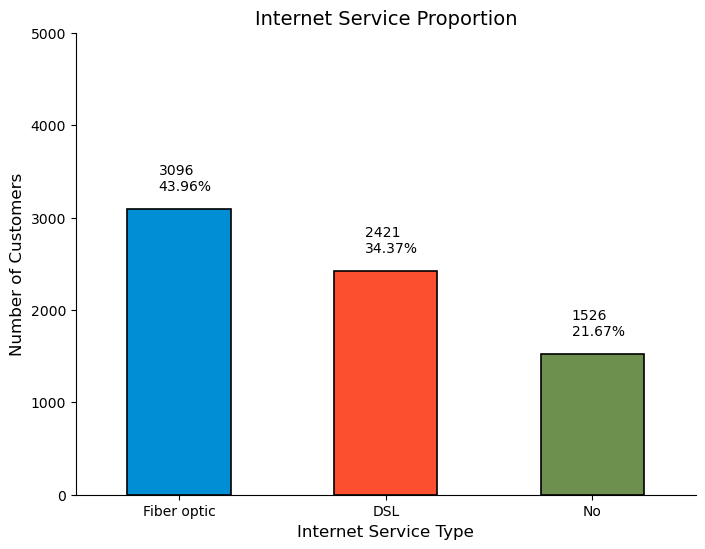

In [11]:
# Plotting the proportion of Internet Service Users

internet_service_counts = telco['InternetService'].value_counts()
labels = ['DSL', 'Fiber optic', 'No']
colors = ['#008fd5', '#fc4f30','#6d904f']
explode = (0.03, 0.03, 0.1)

percentages = round(internet_service_counts/internet_service_counts.sum()*100, 2).astype(str) + '%'

ax = internet_service_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Internet Service Proportion', fontsize=14)
ax.set_xlabel('Internet Service Type', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 5000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


**_3,096_** representing **_43.96%_** of customers use **_Fiber optic_** internet service, while customers who use ***DSL*** snd those wthout ***(No)*** internet service are **_34.37%_** and **_21.67%_** respectively.

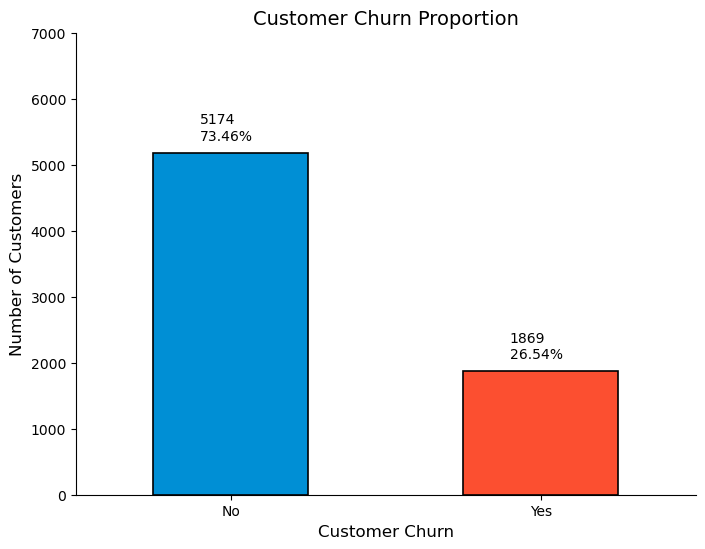

In [12]:
# Plotting the ratio of customer churn

customer_churn_counts = telco['Churn'].value_counts()
labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
explode = (0.03, 0.03)

percentages = round(customer_churn_counts/customer_churn_counts.sum()*100, 2).astype(str) + '%'

ax = customer_churn_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Customer Churn Proportion', fontsize=14)
ax.set_xlabel('Customer Churn', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 7000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


The churn distibtion plot shows the proportion of customers who churn vs those who do not. **__5,174__** customers representing **__73.46%__** stayed and **_1,869_** representing **_26.54%_** of the customers churned.

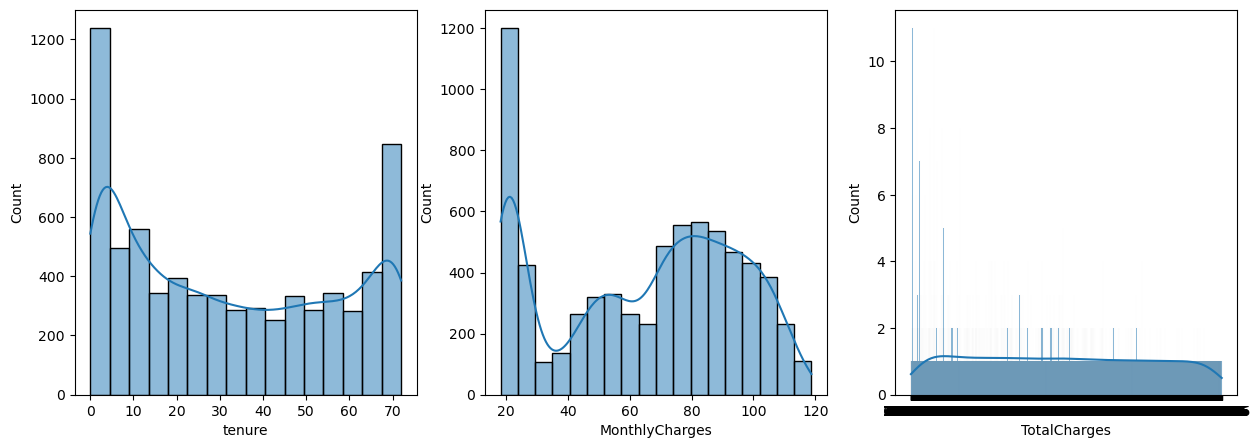

In [13]:
# Numeric variables
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15,5))
for i, var in enumerate(num_vars):
    plt.subplot(1,3,i+1)
    sns.histplot(telco[var], kde=True)
    plt.xlabel(var)

plt.show()


From the above plots, we can see that the variables **"Tenure"** and **"MonthlyCharges"** have a relatively normal distribution, while the variable **"TotalCharges"** has a skewed distribution.

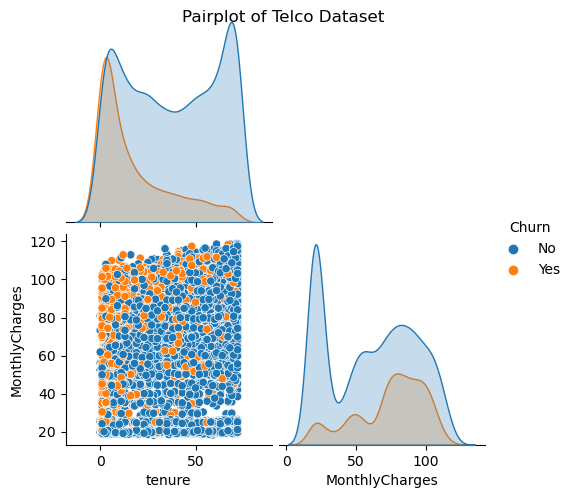

In [14]:

# select relevant columns for pair plot
columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# create pair plot using seaborn
sns.pairplot(telco[columns], hue='Churn', corner=True)

# Add title to plot
plt.suptitle('Pairplot of Telco Dataset', fontsize=12)

plt.show()


*__From this plot, we observe three key things;__*
1. There is a higher proportion of customers who do not churn. 
2. Those who churn pay about the same amount in monthly charges as those that do not churn.
3. Customers who do not churn stay longer on the network (i.e higher tenure)

#### Bivariate Analysis

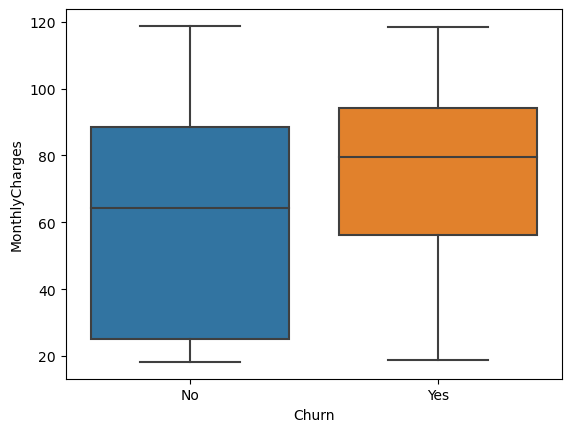

In [15]:
# Create a boxplot of MonthlyCharges by Churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco)
plt.show()

Customers who churn, pay on average, 80 montly-on-month.

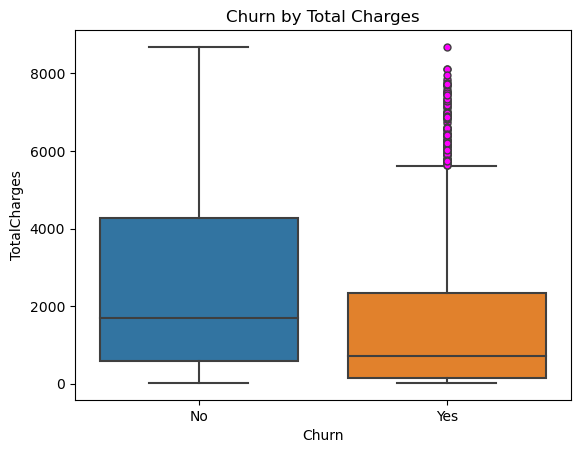

In [16]:

# Convert TotalCharges to a numeric type
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

# Create a boxplot of TotalCharges by Churn status
sns.boxplot(x='Churn', y='TotalCharges', data=telco, flierprops={'markerfacecolor': 'magenta', 'marker': 'o'})
plt.title('Churn by Total Charges')

plt.show()

Our churn box plot shows us two distinctive boxplots. i.e for csutomers who churned and those that did not churn. Those that churned average about 1000 in total charges while those who remained averaged about almost 2000, twice as much as those who churned. Suprisingly, some outliers, who churned, indicated by he purple dots, had much higher total charges.Since they appear to be high paying customes, it would be a good idea to offer them customized products/service in order to retain them.

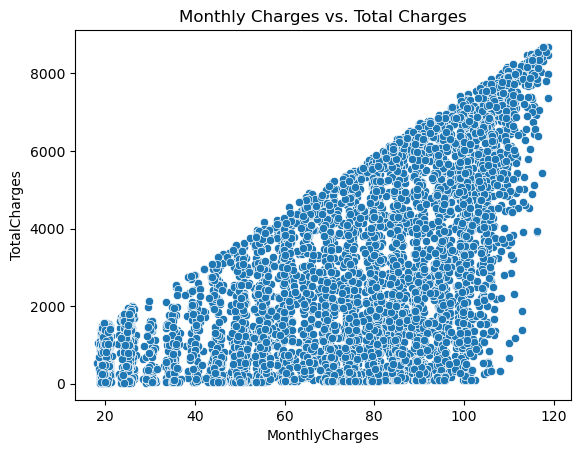

In [17]:
# Correlation matrix between monthly charges and total charges
sns.scatterplot(data=telco, x='MonthlyCharges', y='TotalCharges')
plt.title('Monthly Charges vs. Total Charges')
plt.show()



Here, we see that the more ccustomers pay on a monthly basis, the more they accrue in total charges. Whereas customers who pay less per month, also tend to pay less over time.

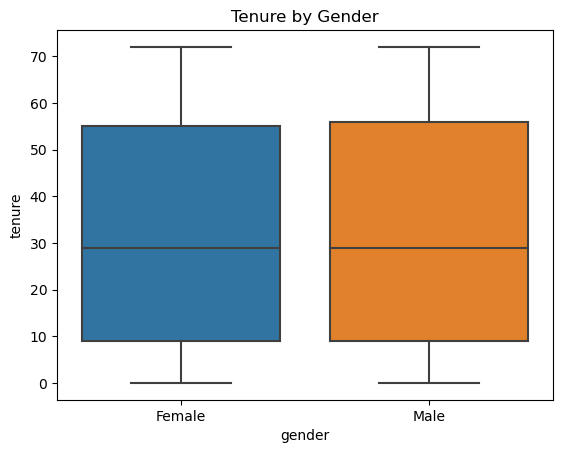

In [18]:
# Boxplot of tenure by gender
sns.boxplot(data=telco, x='gender', y='tenure')
plt.title('Tenure by Gender')
plt.show()


The duration of stay on the network is just about the same. 

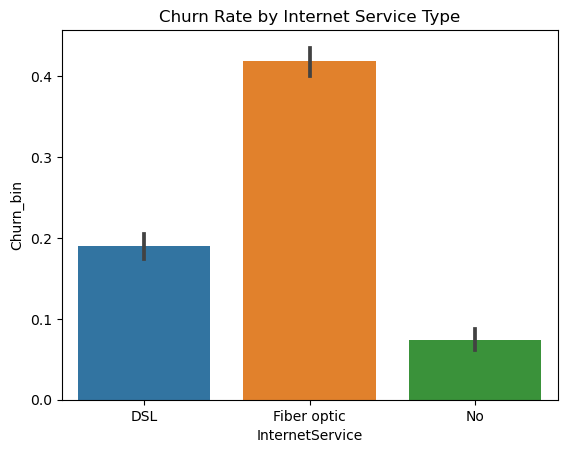

In [19]:
# Convert Churn column to binary encoding
telco['Churn_bin'] = telco['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Bar chart of churn rate by internet service type
sns.barplot(data=telco, x='InternetService', y='Churn_bin')
plt.title('Churn Rate by Internet Service Type')
plt.show()


From this bar plot, we see that the group of customers with the most churn are those who use the ***fiber optic internet service.*** Now this may not be the actual/only reason they churn but it gives us an idea of some possible issue they may need adressing. About __40%__ of the those with internet service is a huge number proportion which calls for some attention.

#### Multivariate Analysis

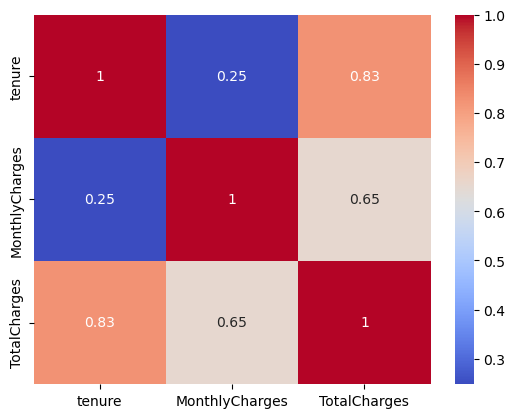

In [20]:
# Create a heatmap of correlations between variables
corr = telco[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In the multivariate analysis, Total Charges has a stronger correlation with tenure than the Monthly charges.

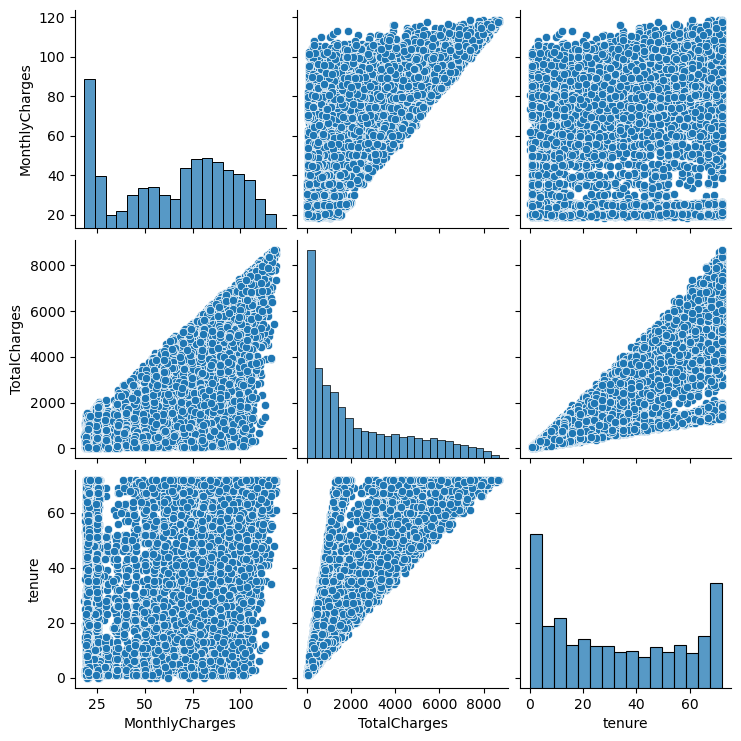

In [21]:
# Pairwise scatterplot of monthly charges, total charges, and tenure
sns.pairplot(telco[['MonthlyCharges', 'TotalCharges', 'tenure']])
plt.show()


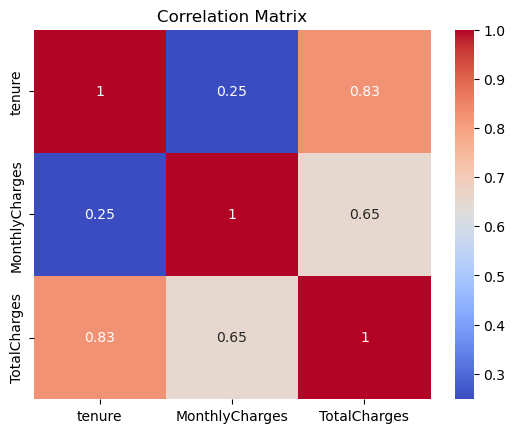

In [22]:
# Heatmap correlation of the data
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


From the above heatmap, we observe that there is a higher correlation between the *__"tenure"__* and the *__"TotalCharges"__* variables. This indicates that the longer a customer stays with the network, the more total charges they accrue.